In [1]:
import os
from __future__ import print_function, absolute_import
import elastix
import matplotlib.pyplot as plt
import numpy as np
import imageio
import SimpleITK as sitk

In [2]:
ELASTIX_PATH = os.path.join('C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/myfolder/elastix.exe')
TRANSFORMIX_PATH = os.path.join('C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/myfolder/transformix.exe')
if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if os.path.exists('results') is False:
    os.mkdir('results')
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

# Affine registration

In [10]:
fixed_image_path = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p102/mr_bffe.mhd'
moving_image_path = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p108/mr_bffe.mhd'
parameter_file_path_affine = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/parameters_affine.txt'


In [11]:
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[parameter_file_path_affine],
    output_dir='results')

C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/myfolder/elastix.exe -f C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p102/mr_bffe.mhd -m C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p108/mr_bffe.mhd -p C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/parameters_affine.txt -out results


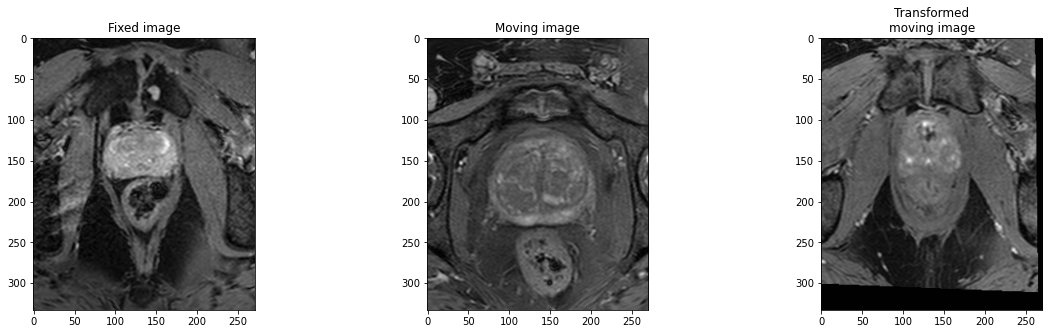

In [12]:
result_path_affine = os.path.join('results', 'result.0.mhd')
fixed_image = imageio.imread(fixed_image_path)[40,:,:]
moving_image = imageio.imread(moving_image_path)[40,:,:]
transformed_moving_image = imageio.imread(result_path_affine)[40,:,:]
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')

plt.show()

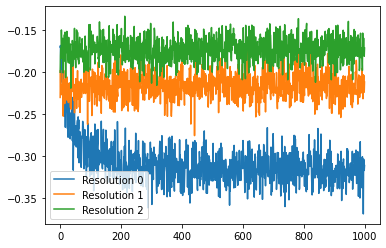

In [14]:
for i in range(3):
    log_path = os.path.join('results', 'IterationInfo.0.R{}.txt'.format(i))
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    plt.plot(log['itnr'], log['metric'])
plt.legend(['Resolution {}'.format(i) for i in range(3)])

# Transformation

Make sure that you manually change the FinalBSplineInterpolationOrder to 0 in the TransFormParameters.0.txt file

In [32]:
moving_image_path_new = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p107/prostaat.mhd'
# Make a new transformix object tr with the CORRECT PATH to transformix
tr_affine =elastix.TransformixInterface(parameters='results/TransformParameters.0.txt',
transformix_path=TRANSFORMIX_PATH)
transformed_image_path_affine = tr_affine.transform_image(moving_image_path_new, output_dir=r'results')

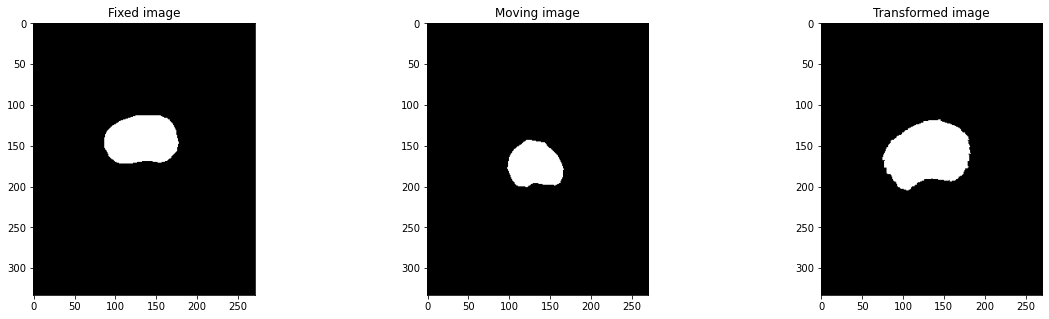

In [33]:
fixed_image_path_new = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p102/prostaat.mhd'
fixed_image_new = imageio.imread(fixed_image_path_new)[40,:,:]
moving_image_new = imageio.imread(moving_image_path_new)[40,:,:]
transformed_moving_image_new= imageio.imread(transformed_image_path_affine.replace('dcm', 'tiff'))[40,:,:]
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image_new, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image_new, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image_new, cmap='gray')
ax[2].set_title('Transformed image')
plt.show()

In [30]:
import ipywidgets as ipyw

%matplotlib inline

class ImageSliceViewer3D:
    """ 
    ImageSliceViewer3D is for viewing volumetric image slices in jupyter or
    ipython notebooks. 
    
    User can interactively change the slice plane selection for the image and 
    the slice plane being viewed. 

    Argumentss:
    Volume = 3D input image
    figsize = default(8,8), to set the size of the figure
    cmap = default('plasma'), string for the matplotlib colormap. You can find 
    more matplotlib colormaps on the following link:
    https://matplotlib.org/users/colormaps.html
    
    """
    
    def __init__(self, volume, figsize=(8,8), cmap='plasma'):
        self.volume = volume
        self.figsize = figsize
        self.cmap = cmap
        self.v = [np.min(volume), np.max(volume)]
        
        # Call to select slice plane
        ipyw.interact(self.view_selection, view=ipyw.RadioButtons(
            options=['x-y','y-z', 'z-x'], value='x-y', 
            description='Slice plane selection:', disabled=False,
            style={'description_width': 'initial'}))
    
    def view_selection(self, view):
        # Transpose the volume to orient according to the slice plane selection
        orient = {"y-z":[1,2,0], "z-x":[2,0,1], "x-y": [0,1,2]}
        self.vol = np.transpose(self.volume, orient[view])
        maxZ = self.vol.shape[2] - 1
        
        # Call to view a slice within the selected slice plane
        ipyw.interact(self.plot_slice, 
            z=ipyw.IntSlider(min=0, max=maxZ, step=1, continuous_update=False, 
            description='Image Slice:'))
        
    def plot_slice(self, z):
        # Plot slice for the given plane and slice
        self.fig = plt.figure(figsize=self.figsize)
        plt.imshow(self.vol[:,:,z], cmap=plt.get_cmap(self.cmap), 
            vmin=self.v[0], vmax=self.v[1])


        
# Create a 3D array with random numbers
x = np.random.rand(256,256,96)
im=imageio.imread(fixed_image_path_new)
ImageSliceViewer3D(im)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…